In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import petl as etl
import seaborn as sns
import petlx.bio
import scipy
import numpy as np

In [2]:
bf_tbl = pd.read_csv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/BFcol_vs_BFgam/putative_directional_selection.tab', sep="\t")

In [3]:
gh_tbl = pd.read_csv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/GHcol_vs_GHgam/putative_directional_selection.tab', sep="\t")

In [4]:
gn_tbl = pd.read_csv('/mnt/hgfs/D/Drive/Dropbox/Ag1000G_carlo/tesi_magistrale/script/data/hka_homogen/GNcol_vs_GNgam/putative_directional_selection.tab', sep="\t")

In [16]:
tbl1 = pd.merge(bf_tbl, gh_tbl, on='gene', how='inner')
tbl1

,chrom_x,gene,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,segreg_c_y,pri_der_fix_c_y,score_c_y,segreg_g_y,pri_der_fix_g_y,score_g_y,score_tot_y
0,X,AGAP013341,37,10,116.282513,33,4,19.947474,136.229988,X,11,10,108.963213,7,4,34.296035,143.259249
1,3R,AGAP007732,525,25,57.495478,616,31,73.720753,131.216231,3R,125,23,79.508191,162,32,141.691889,221.200080
2,X,AGAP001076,119,10,40.552544,80,10,58.350971,98.903515,X,36,10,48.181288,26,10,74.596131,122.777418
3,3R,AGAP007736,1966,29,15.058508,2256,47,37.867951,52.926459,3R,663,47,58.985736,859,56,77.808831,136.794567
4,X,AGAP001026,32,5,33.400137,38,4,17.498013,50.898150,X,10,5,34.525895,11,4,25.002856,59.528751
5,3R,AGAP007731,146,10,33.031688,194,8,14.944520,47.976208,3R,32,11,63.360454,41,10,51.809349,115.169803


In [19]:
tbl_all = pd.merge(tbl1, gn_tbl, on='gene', how='inner').rename(columns={'gene':'Gene ID'})
tbl_all

,chrom_x,Gene ID,segreg_c_x,pri_der_fix_c_x,score_c_x,segreg_g_x,pri_der_fix_g_x,score_g_x,score_tot_x,chrom_y,...,score_g_y,score_tot_y,chrom,segreg_c,pri_der_fix_c,score_c,segreg_g,pri_der_fix_g,score_g,score_tot
0,X,AGAP013341,37,10,116.282513,33,4,19.947474,136.229988,X,...,34.296035,143.259249,X,4,10,141.816646,6,4,37.270700,179.087346
1,3R,AGAP007732,525,25,57.495478,616,31,73.720753,131.216231,3R,...,141.691889,221.200080,3R,63,24,132.260951,90,33,244.017154,376.278105
2,X,AGAP001076,119,10,40.552544,80,10,58.350971,98.903515,X,...,74.596131,122.777418,X,14,9,68.116368,11,10,128.420818,196.537186
3,3R,AGAP007736,1966,29,15.058508,2256,47,37.867951,52.926459,3R,...,77.808831,136.794567,3R,476,31,29.604631,401,51,146.455238,176.059869
4,X,AGAP001026,32,5,33.400137,38,4,17.498013,50.898150,X,...,25.002856,59.528751,X,5,5,44.844626,7,4,33.835459,78.680085
5,3R,AGAP007731,146,10,33.031688,194,8,14.944520,47.976208,3R,...,51.809349,115.169803,3R,13,11,99.745320,27,10,71.659294,171.404614


In [21]:
tbl_all[['chrom','Gene ID']].sort_values(by='Gene ID')

,chrom,Gene ID
4,X,AGAP001026
2,X,AGAP001076
5,3R,AGAP007731
1,3R,AGAP007732
3,3R,AGAP007736
0,X,AGAP013341


Genes shared between sympatric populations: 

- AGAP007732 -> Solute carrier family 17, member 5 (Also in Selection Atlas https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/gene/AGAP007732.html)
- AGAP013341 -> marker present in Neafsey 2010 and Aboagye-Antwi et. al 2015
- AGAP001076 -> CYP4G16 (Cytochrome P450 associated with insecticide resistance catalyzes cuticular hydrocarbon production in Anopheles gambiae)
- AGAP007736 -> Selection Atlas H12 Gabon (https://malariagen.github.io/agam-selection-atlas/0.1-alpha2/signal/H12/GAS/3/2/index.html)
- AGAP001026 -> Carboxypeptidase A  (Neafsey 2010)
- AGAP007731 -> ???

--------------------------------

In [7]:
def bar_plot(score1,score2,score3, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    

    # set width of bar
    barWidth = 0.25

    # set height of bar
    score_bf = score1
    score_gh = score2
    score_gn = score3

    # Set position of bar on X axis
    r1 = np.arange(len(score1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    plt.bar(r1, score_bf, color='#0080ff', width=barWidth, edgecolor='white', label='Burkina Faso')
    plt.bar(r2, score_gh, color='#557f2d', width=barWidth, edgecolor='white', label='Ghana')
    plt.bar(r3, score_gn, color='#ff9933', width=barWidth, edgecolor='white', label='Guinea')

    # Add xticks on the middle of the group bars
    plt.xlabel('Genes', fontweight='bold')
    plt.xticks([r + barWidth for r in range(len(score1))], ['AGAP013341',  'AGAP007732',  'AGAP001035',  'AGAP001076',  'AGAP007736',  'AGAP001026',  'AGAP007731',  'AGAP001029',  'AGAP001033',  'AGAP001043',  'AGAP001090'], rotation=45)
    plt.ylabel('Total Score', fontweight='bold')

    sns.despine()
    ax.set_title(title)
    # Create legend & Show graphic
    plt.legend()
    plt.show()

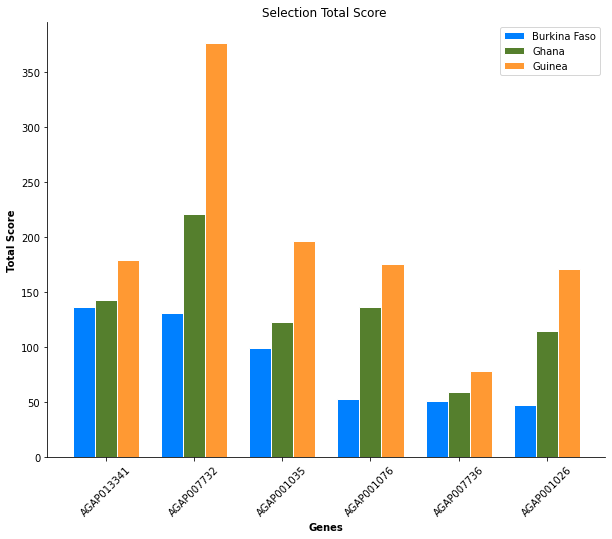

In [8]:
bar_plot(tbl_all['score_bf'],tbl_all['score_gh'],tbl_all['score_gn'], 'Selection Total Score ')

-----------------------------

---------------------------

## Genes plot

In [26]:
tbl_genes  = (etl
    .fromgff3('/mnt/hgfs/D/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.gff3.gz')
    .unpackdict('attributes')
    .cut(0,2,3,4,9)
    .select(lambda rec: rec.type == 'gene')
    .rename('ID', 'gene')
    .rename('seqid', 'chrom')

)
tbl_genes.display(10)

chrom,type,start,end,gene
2L,gene,157348,186936,AGAP004677
2L,gene,203779,205293,AGAP004678
2L,gene,207894,210460,AGAP004679
2L,gene,271285,271815,AGAP004680
2L,gene,358329,359280,AGAP004681
2L,gene,433503,461627,AGAP004682
2L,gene,485698,488369,AGAP004683
2L,gene,493039,493543,AGAP004684
2L,gene,493579,497632,AGAP004685
2L,gene,742004,747057,AGAP004686


In [24]:
tbl_shared = etl.fromdataframe(tbl_all)
tbl_shared

gene,score_bf,score_gh,score_gn
AGAP013341,136.22998782759998,143.259248708,179.0873462598
AGAP007732,131.2162310909,221.2000802268,376.278104581
AGAP001076,98.9035154884,122.7774181493,196.5371857021
AGAP007736,52.926458548,136.7945671242,176.0598694071
AGAP001026,50.898149905100006,59.52875147939999,78.68008529709998


In [29]:
pos_hka_shared = tbl_shared.join(tbl_genes, key='gene').cut(0,4,5,6,7)
pos_hka_shared.displayall()

gene,chrom,type,start,end
AGAP001026,X,gene,19721319,19723125
AGAP001076,X,gene,22937392,22947129
AGAP007731,3R,gene,13603,21758
AGAP007732,3R,gene,24056,39486
AGAP007736,3R,gene,82151,142545
AGAP013341,X,gene,23797952,23801974


In [30]:
import matplotlib.patches as mpatches
gff_fn = '/mnt/hgfs/D/Genomes/genome/Anopheles-gambiae-PEST_BASEFEATURES_AgamP4.2.sorted.gff3.gz'



def plot_gene_annotation(chrom, start, stop, title, ax=None): 
    start = start - 1000
    stop = stop + 1000
    tabix_index= "%s:%s-%s" % (chrom, start, stop)
    gff = petlx.bio.gff3.fromgff3(gff_fn, tabix_index)
    tbl_features = (gff.unpackdict('attributes', ['ID'])
                .addfield('length', lambda r: r.end - r.start)
                )
    xranges_gene = tbl_features.selecteq('type', 'gene').values(['start', 'length']).list()
    xranges_exon = tbl_features.selecteq('type', 'exon').values(['start', 'length']).list()
    xranges_CDS = tbl_features.selecteq('type', 'CDS').values(['start', 'length']).list()

    if ax is None:
        # make a new figure here
        fig, ax = plt.subplots(figsize=(10,3))
        
    bar_gene= ax.broken_barh(xranges_gene, (0.125, 0.05), facecolors='#FF3333')    
    bar_exon= ax.broken_barh(xranges_exon, (0.1, 0.1), facecolors='#FFFF00', linewidth=0.2)
    bar_CDS = ax.broken_barh(xranges_CDS, (0.1, 0.1), facecolors='#0CF91C', linewidth=0.2)
   
    ax.set_title(title)
    ax.set_ylim(0,1)
    #ax.set_xlim(start-(gene_lenght/4), stop+(gene_lenght/4))
    ax.set_xlim(start, stop)
    ax.set_yticks([])
    cds_patch = mpatches.Patch(color='#0CF91C', label='CDS')
    exon_patch = mpatches.Patch(color='#FFFF00', label='Exon')
    intr_patch = mpatches.Patch(color='#FF3333', label='Intron')
    plt.legend(handles=[cds_patch, exon_patch, intr_patch],prop={'size':12})
    

    #ax.annotate('ciao', (21344460, 0.2), xycoords='data', xytext=(0,50),
                #textcoords='offset points', rotation=90, ha='center', va='bottom', color='k', 
                            #fontsize=20, arrowprops=dict(facecolor='black', shrink=0.05
                                                        #))
    sns.set(style ='ticks',font_scale=2)
    sns.despine(left=True)



In [31]:
title = pos_hka_shared['gene']

In [32]:
chrom = pos_hka_shared['chrom']

In [33]:
start = pos_hka_shared['start']
end = pos_hka_shared['end']

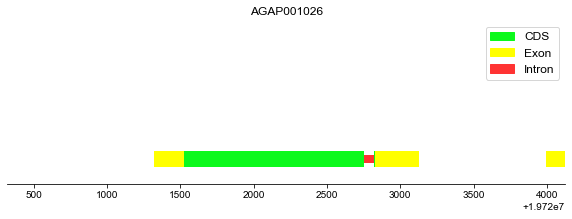

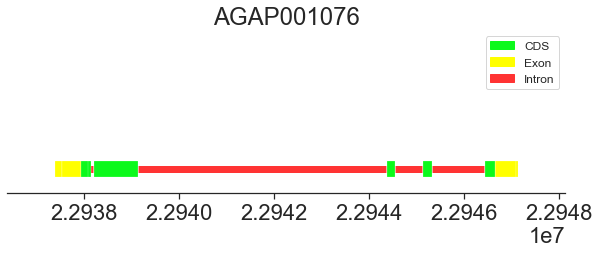

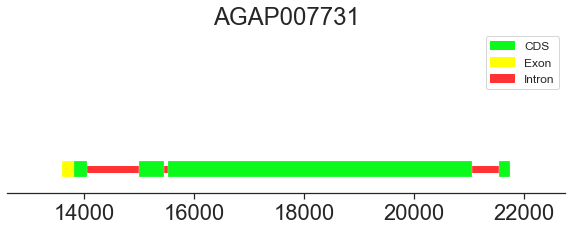

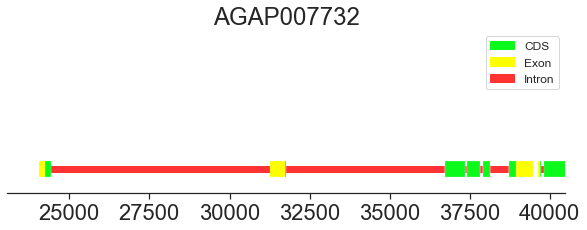

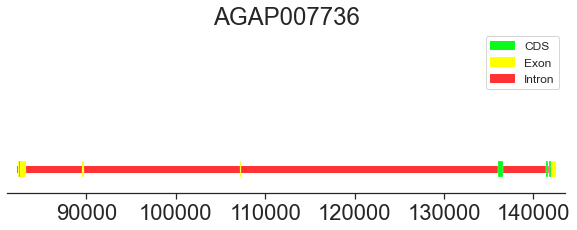

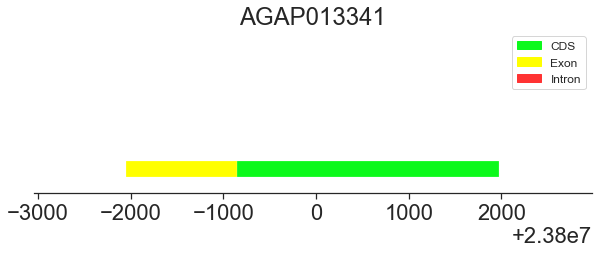

In [35]:
for i in range(len(chrom)):
    plot_gene_annotation(chrom[i], start[i], end[i], title[i])

---------------------------------